In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df = sns.load_dataset('flights')

In [4]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
df.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [6]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cap stone/Telecom churn/cell2celltrain.csv')

In [9]:
x = df.shape
print(f'the dataset has {x[0]} rows and {x[1]} columns')

the dataset has 51047 rows and 58 columns


In [10]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [12]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [13]:
df = df.dropna()

In [14]:
missing_values = df.isna().sum()
print(missing_values)

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [15]:
temp_x = df.columns
temp_y = df.describe().columns
res = [item for item in temp_x if item not in temp_y]
print(res)

['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']


In [16]:
# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
  if column in res:
    result = len(df[column].unique())
    print(f"The number of unique variables in {column} column are: {result}")
    if result<=17:
      x = df[column].unique()
      print(f'printing unique values of {column}')
      print('the values are: ', x )
      print('--'*30)


The number of unique variables in Churn column are: 2
printing unique values of Churn
the values are:  ['Yes' 'No']
------------------------------------------------------------
The number of unique variables in ServiceArea column are: 743
The number of unique variables in ChildrenInHH column are: 2
printing unique values of ChildrenInHH
the values are:  ['No' 'Yes']
------------------------------------------------------------
The number of unique variables in HandsetRefurbished column are: 2
printing unique values of HandsetRefurbished
the values are:  ['No' 'Yes']
------------------------------------------------------------
The number of unique variables in HandsetWebCapable column are: 2
printing unique values of HandsetWebCapable
the values are:  ['Yes' 'No']
------------------------------------------------------------
The number of unique variables in TruckOwner column are: 2
printing unique values of TruckOwner
the values are:  ['No' 'Yes']
----------------------------------------

In [17]:
df.drop('CustomerID', axis = 1, inplace = True)

In [18]:
df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [19]:
 num_col = df.describe().columns

In [20]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [21]:
X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [22]:
X = pd.get_dummies(X, drop_first=True)

In [23]:
y = pd.get_dummies(y, drop_first=True)

In [24]:
y.head()

,Yes
0,1
1,1
2,0
3,0
4,1


In [25]:
X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,0,0,1,0,0,0,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,0,0,1,0,0,0,0,1
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,0,1,0,0,0,0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [26]:
# import sklearn
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 14)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
X_train.shape

(39801, 825)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [47]:
clas = Sequential()

In [32]:
len(X.columns)

825

In [48]:
clas.add(Dense(units=len(X.columns), activation = 'relu'))

In [49]:
clas.add(Dense(units = len(X.columns)/3, activation = 'LeakyReLU'))
clas.add(Dense(units = len(X.columns)/8, activation = 'PReLU'))
clas.add(Dense(units = 7, activation = 'ELU'))
clas.add(Dense(1, activation = 'sigmoid'))

In [35]:
import keras

In [36]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [50]:
clas.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [51]:
es = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0.01,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [52]:
from keras.api._v2.keras.callbacks import EarlyStopping
model_h = clas.fit(X_train,y_train, validation_split=0.9, batch_size=100, epochs = 100, callbacks= es)

Epoch 1/100
40/40 [==============================] - 5s 96ms/step - loss: 0.6172 - accuracy: 0.7065 - val_loss: 0.5993 - val_accuracy: 0.7118
Epoch 2/100
40/40 [==============================] - 3s 66ms/step - loss: 0.5576 - accuracy: 0.7229 - val_loss: 0.6122 - val_accuracy: 0.7070
Epoch 3/100
40/40 [==============================] - 6s 160ms/step - loss: 0.5206 - accuracy: 0.7447 - val_loss: 0.6384 - val_accuracy: 0.6906
Epoch 4/100
40/40 [==============================] - 3s 83ms/step - loss: 0.4811 - accuracy: 0.7621 - val_loss: 0.7322 - val_accuracy: 0.6958
Epoch 5/100
40/40 [==============================] - 3s 66ms/step - loss: 0.4286 - accuracy: 0.7902 - val_loss: 0.8040 - val_accuracy: 0.6664
Epoch 6/100
40/40 [==============================] - 3s 84ms/step - loss: 0.3789 - accuracy: 0.8254 - val_loss: 0.8413 - val_accuracy: 0.6710
Epoch 7/100
40/40 [==============================] - 4s 101ms/step - loss: 0.3247 - accuracy: 0.8553 - val_loss: 1.0160 - val_accuracy: 0.6500
Epoc

In [40]:
type(model_h.history)

dict

In [41]:
hdf = pd.DataFrame(model_h.history)

Text(0.5, 58.5815972222222, 'Feature/Property')

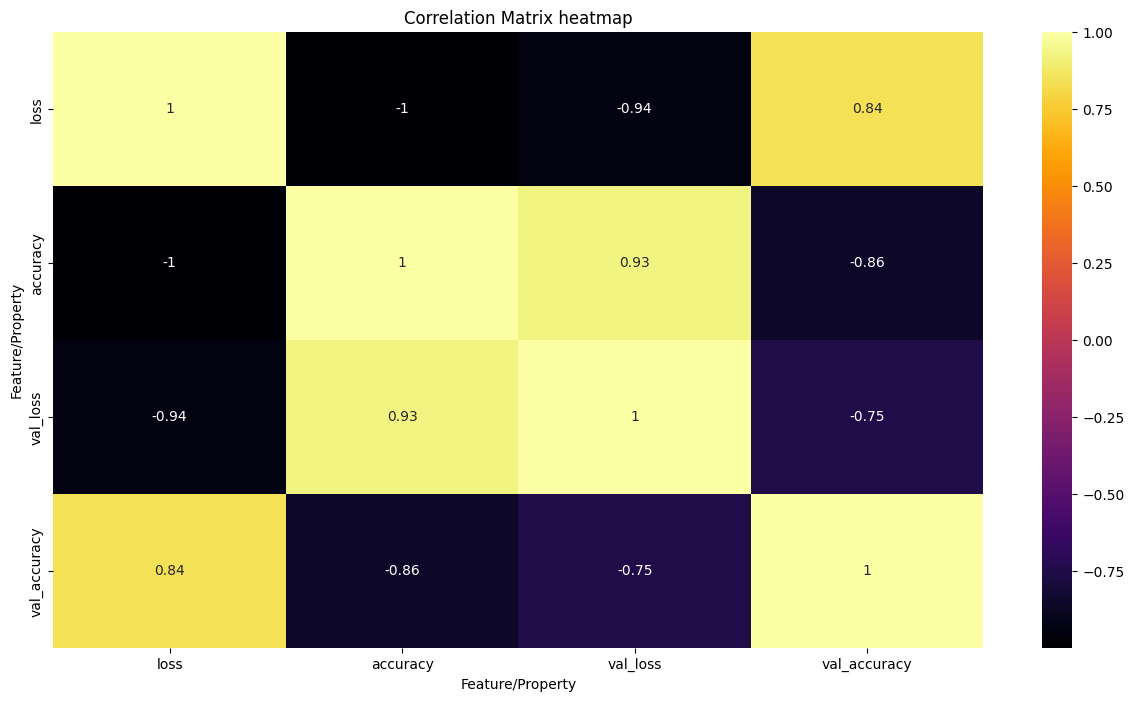

In [42]:
corr_matrix = hdf.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

Text(0.5, 0, 'Feature/Property')

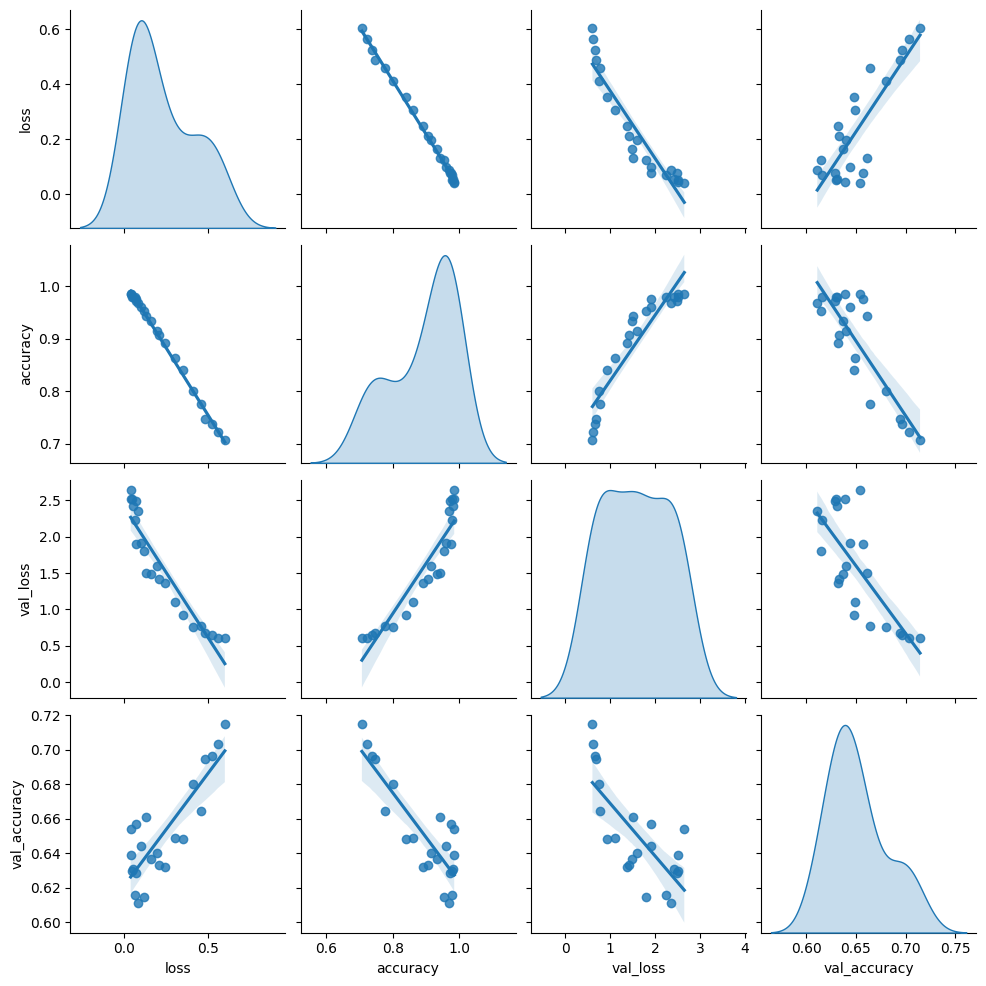

In [43]:
sns.pairplot(hdf, diag_kind="kde", kind = 'reg')


#setting labels to infer the plot
# plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

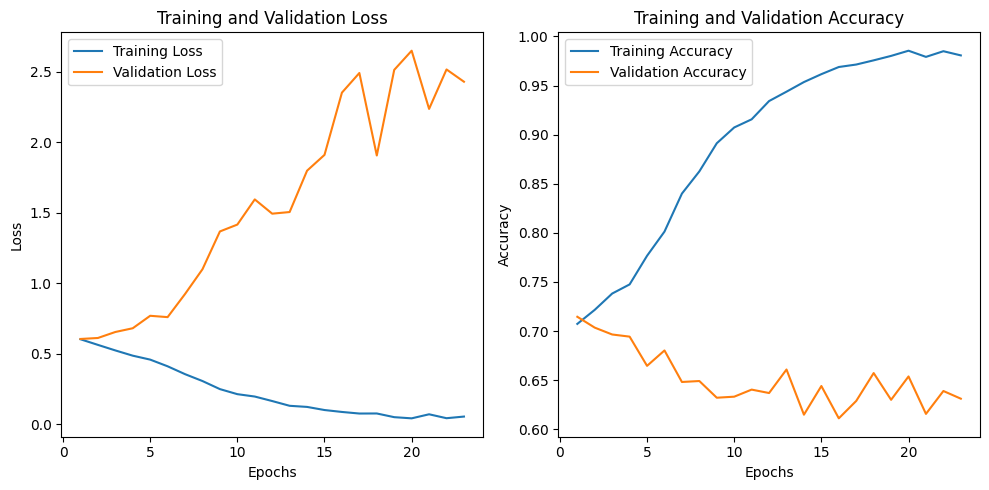

In [44]:
history = model_h.history

# Extract the values for 'loss', 'accuracy', 'val_loss', and 'val_accuracy'
loss = history['loss']
accuracy = history['accuracy']
val_loss = history['val_loss']
val_accuracy = history['val_accuracy']

# Create a list of epochs or steps
epochs = range(1, len(loss) + 1)

# Plot 'loss' and 'val_loss'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot 'accuracy' and 'val_accuracy'
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [169]:
model_h.history['loss']

[0.6226177215576172,
 0.5404900908470154,
 0.49533385038375854,
 0.4605816900730133,
 0.41858360171318054,
 0.3725490868091583,
 0.3139261305332184,
 0.2602420449256897,
 0.20126613974571228,
 0.17489908635616302,
 0.12769918143749237,
 0.11457967758178711,
 0.08364073187112808,
 0.060981787741184235,
 0.04585147276520729,
 0.039501648396253586,
 0.047057121992111206]

In [ ]:
str1 = 'The quick brown fox jumps over the lazy dog'
n = 10
l = len(str1)
k = 5
split1 = str1[:n]
split2 = str1[n:n+k]
split3 = str1[n+k:]

split2 = split2[::-1]
res = split1 + split2 + split3
print(res)

The quick nworb fox jumps over the lazy dog


In [ ]:
rows = 5
for j in range(rows+1, 0, -1):
  print("* " * j)

* * * * * * 
* * * * * 
* * * * 
* * * 
* * 
* 


In [ ]:
rows = 10
for j in range(1, rows,):
    print("* " * j)
for j in range(rows, 0, -1):
  print("* " * j)

* 
* * 
* * * 
* * * * 
* * * * * 
* * * * * * 
* * * * * * * 
* * * * * * * * 
* * * * * * * * * 
* * * * * * * * * * 
* * * * * * * * * 
* * * * * * * * 
* * * * * * * 
* * * * * * 
* * * * * 
* * * * 
* * * 
* * 
* 


In [ ]:
import pandas as pd
inp ='abcdefghijklmnopqrstuvwxyz'
lis = []
for i in inp:
  lis.append(i)
series_n = 'xyz'
s = pd.Series(lis, name = series_n)
print(s)


0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
14    o
15    p
16    q
17    r
18    s
19    t
20    u
21    v
22    w
23    x
24    y
25    z
Name: xyz, dtype: object
